<a href="https://colab.research.google.com/github/KevinH2003/PyTorch-Fundamentals/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#PyTorch Workflow
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias
#hiii

In [162]:
training = int(0.7 * len(x))
xtraining, ytraining = x[:training], y[:training]
xtesting, ytesting = x[training:], y[training:]

def plot_predictions(train_data=xtraining, train_labels=ytraining, test_data=xtesting, test_labels=ytesting, predictions=None):
    """Plots training, test, and predictions"""
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")
  #plot the training data in blue, testing data in red

    if predictions is not None:
    #plot the predictions if they exist
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

    plt.legend(prop={"size": 14})


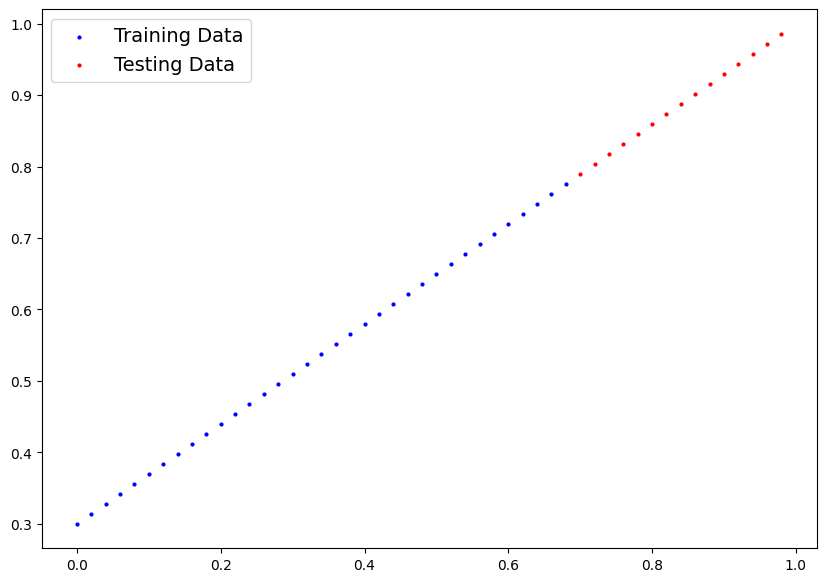

In [163]:
plot_predictions();

In [164]:
class LinRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #start with random weight, try to get it to the ideal weight
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #start with random bias, try to get it to the ideal bias

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

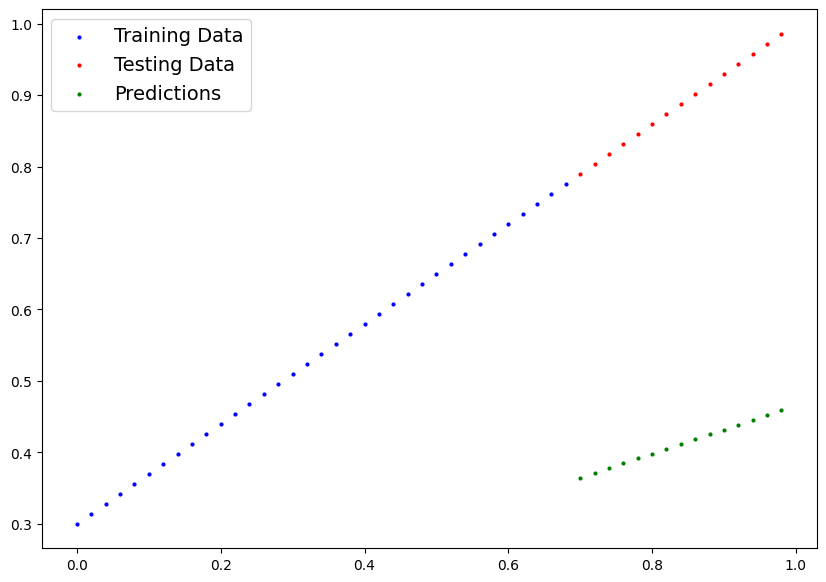

In [165]:
torch.manual_seed(42)

model0 = LinRegModel()

with torch.inference_mode():
    y_preds = model0(xtesting)

    plot_predictions(predictions=y_preds)

model0.state_dict()

In [168]:
loss1 = nn.L1Loss()
loss2 = nn.MSELoss()

optim = torch.optim.SGD(params=model0.parameters(), lr=0.01)

epochs = 100

for epoch in range(epochs):
    model0.train()
    ypred = model0(xtraining)
    loss = loss1(ypred, ytraining)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model0.eval()
    with torch.inference_mode():
        test_pred = model0(xtesting)
        test_loss = loss1(test_pred, ytesting)

    if epoch % 25 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")

Epoch: 0, Loss: 0.026395238935947418, Test Loss: 0.07136490941047668
Epoch: 25, Loss: 0.01958492398262024, Test Loss: 0.0527588352560997
Epoch: 50, Loss: 0.012774603441357613, Test Loss: 0.034152738749980927
Epoch: 75, Loss: 0.005964284297078848, Test Loss: 0.0155466478317976


OrderedDict([('weight', tensor([0.6942])), ('bias', tensor([0.2985]))])

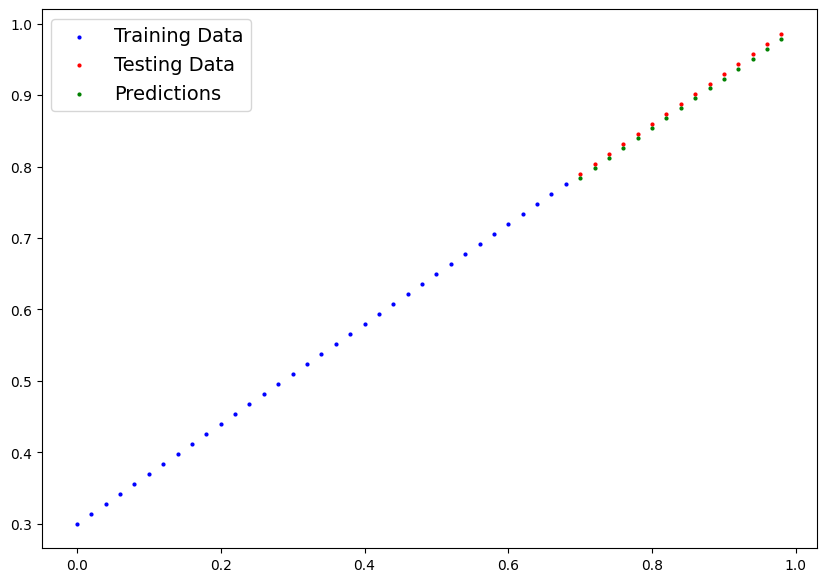

In [169]:
with torch.inference_mode():
    y_preds_new = model0(xtesting)
    plot_predictions(predictions=y_preds_new)

model0.state_dict()